In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from ngsolve.webgui import Draw


# Find the correct font path
# font_path = "/usr/share/fonts/truetype/stix2/STIXTwoText-Regular.ttf"  # Update path if needed
# math_font_path = "/usr/share/fonts/truetype/stix2/STIX2Math.otf"  # Update path if needed
# stix_font = fm.FontProperties(fname=font_path)
# stix_math_font = fm.FontProperties(fname=math_font_path)

# # Apply the font globally
# plt.rcParams["text.usetex"] = False
# plt.rcParams["font.family"] = stix_font.get_name()
# plt.rcParams["mathtext.fontset"] = "stix"

from scipy.optimize import curve_fit

In [3]:
# Functions for plotting, linear regression fit line for convergence

def reference_line_func(h_values, scaling_factor, slope):

    return scaling_factor * h_values ** slope

def fit_reference_line(h_values, error_values):

    popt, _ = curve_fit(reference_line_func, h_values, error_values, p0=[1, 1])

    scaling_factor, slope = popt
    return scaling_factor, slope

In [4]:
df = pd.read_csv('all_2D_1forms_simulation_results.csv')

In [5]:
h_list = df['hmax'].unique()
order_list = df['order'].unique()
Cw_list = df['C_w'].unique()
nDof_list = df['ndof'].unique()


#e41a1c
#377eb8
#4daf4a
#984ea3
#ff7f00

color1 = "#e41a1c"
color2 = "#377eb8"
color3 = "#4daf4a"
color4 = "#984ea3"
color5 = "#ff7f00"

# print(h_list)
# print(order_list)
# print(Cw_list)
# print(nDof_list)
# print(df.head())

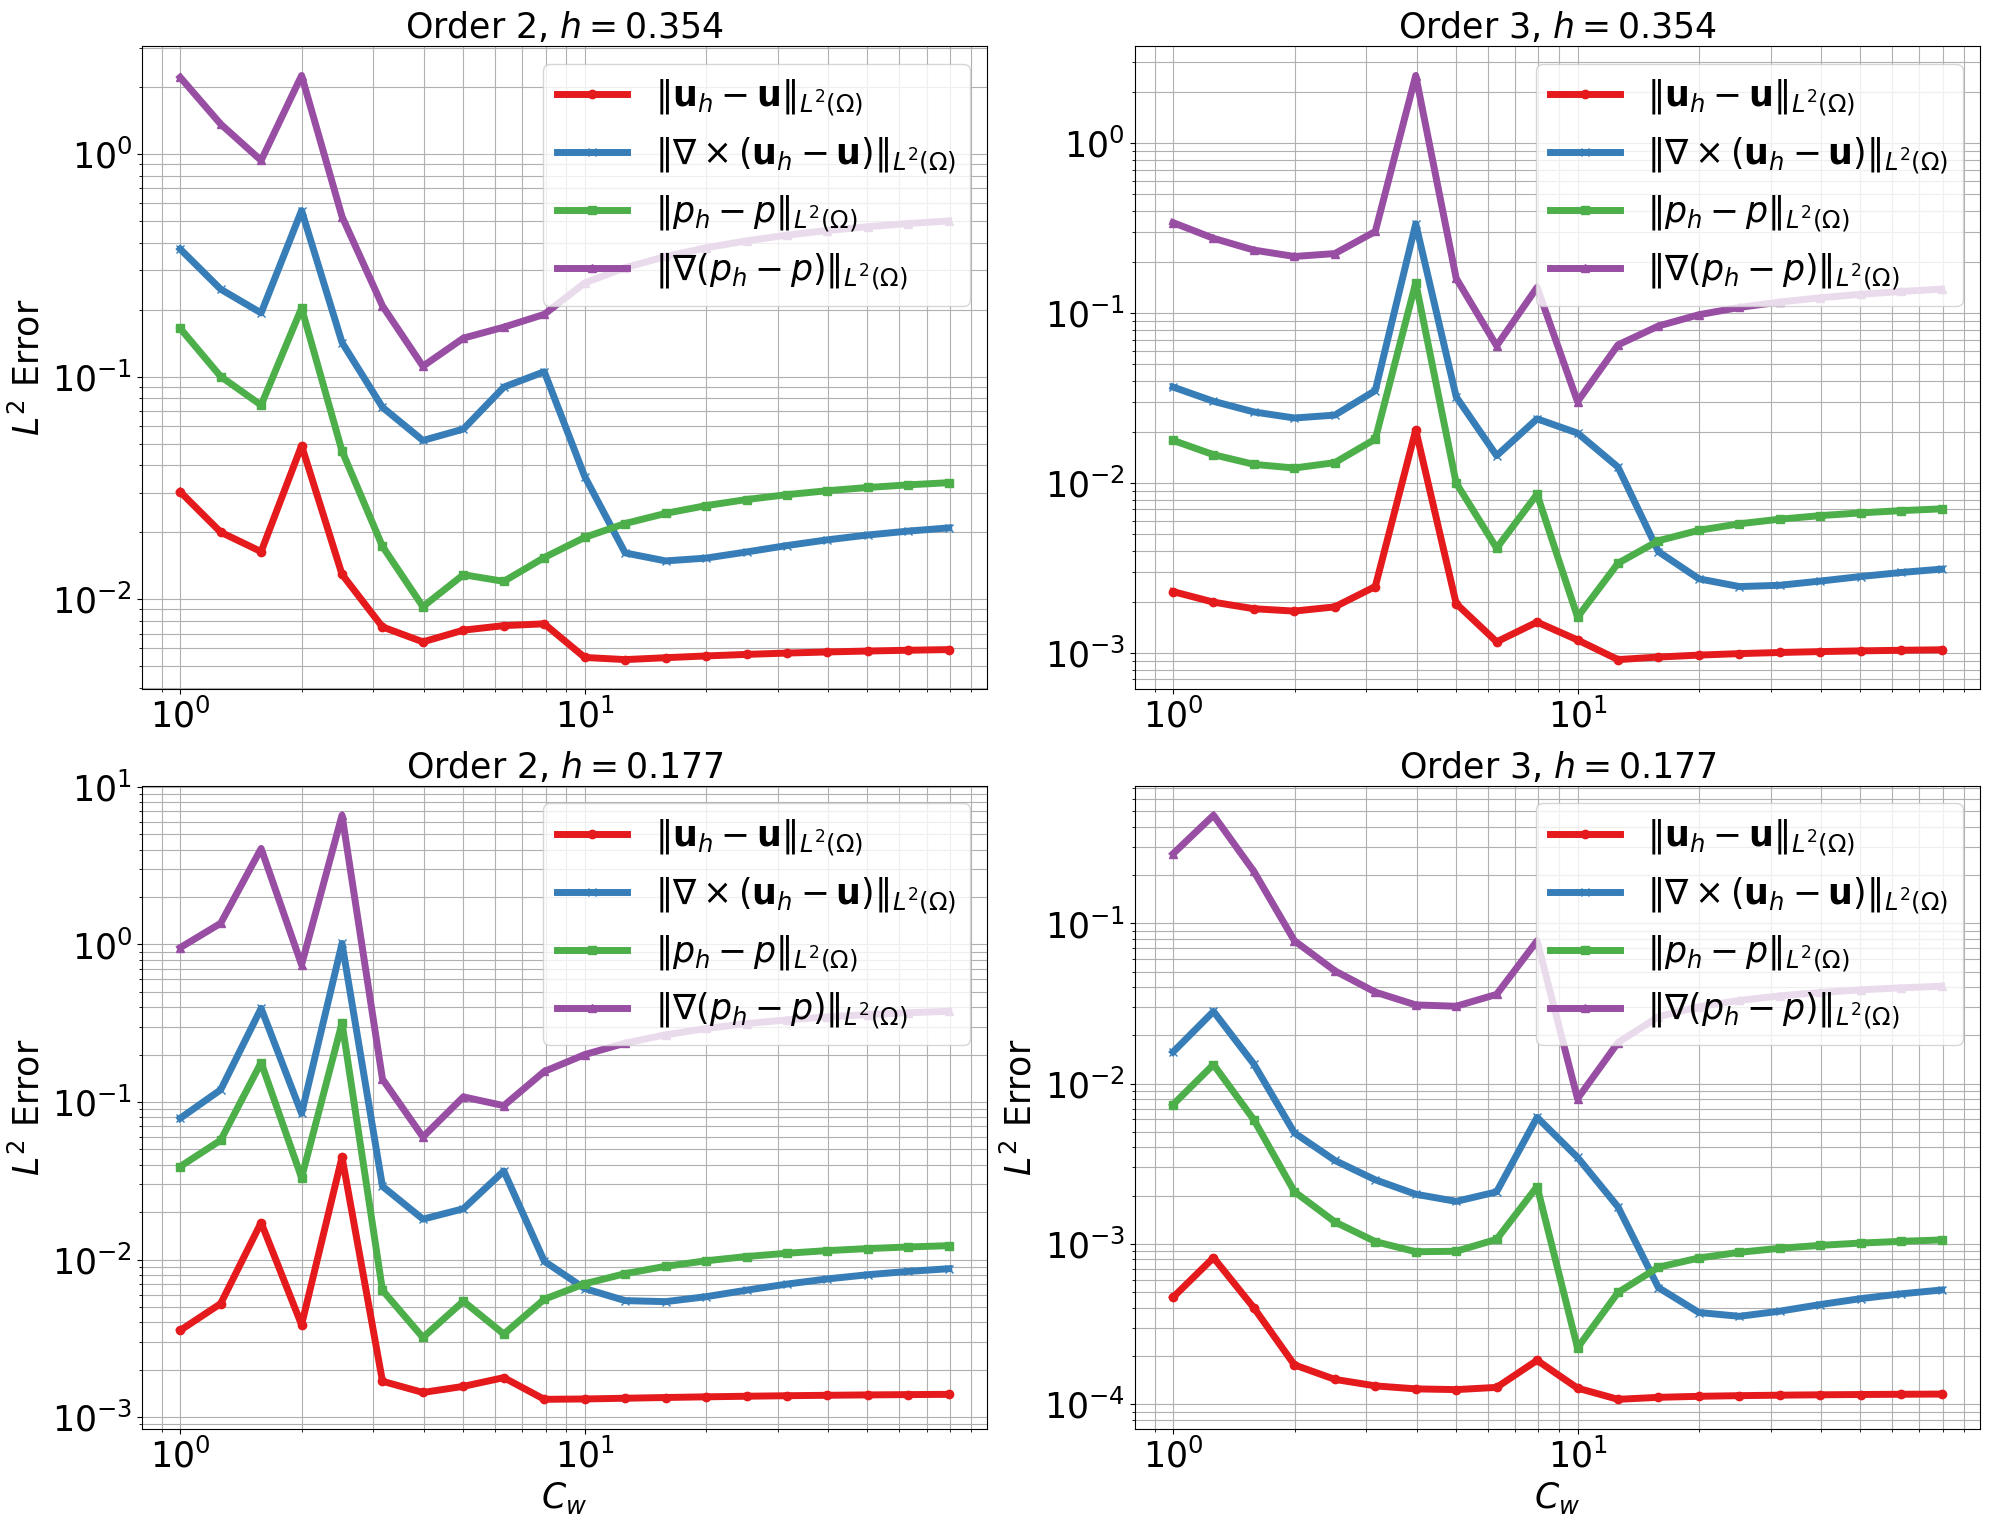

In [6]:
saveFigure1 = True
font_size = 25
line_width = 5
y_min, y_max = 1e-3, 12

chosen_hmax_1 = h_list[0]
chosen_hmax_2 = h_list[1]

order1 = order_list[1]
order2 = order_list[2]

df_refinement1 = df[df['hmax'] == chosen_hmax_1]
df_order1_h1 = df_refinement1[df_refinement1['order'] == order1]
df_order2_h1 = df_refinement1[df_refinement1['order'] == order2]

df_refinement2 = df[df['hmax'] == chosen_hmax_2]
df_order1_h2 = df_refinement2[df_refinement2['order'] == order1]
df_order2_h2 = df_refinement2[df_refinement2['order'] == order2]

fig, axs = plt.subplots(2, 2, figsize=(20, 16))


ax = axs[0, 0]
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_u'],
    label=r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$', marker='o', linewidth=line_width, color=color1
)
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_curl_u'],
    label=r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$', marker='x', linewidth=line_width, color=color2
)
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_p'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Omega)}$', marker='s', linewidth=line_width, color=color3
)
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_grad_p'],
    label=r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$', marker='^', linewidth=line_width, color=color4
)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order1}, $h = {round(chosen_hmax_1, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)

ax = axs[0, 1]
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_u'],
    label=r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$', marker='o', linewidth=line_width, color=color1
)
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_curl_u'],
    label=r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$', marker='x', linewidth=line_width, color=color2
)
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_p'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Omega)}$', marker='s', linewidth=line_width, color=color3
)
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_grad_p'],
    label=r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$', marker='^', linewidth=line_width, color=color4
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'Order {order2}, $h = {round(chosen_hmax_1, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)

ax = axs[1, 0]
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_u'],
    label=r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$', marker='o', linewidth=line_width, color=color1
)
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_curl_u'],
    label=r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$', marker='x', linewidth=line_width, color=color2
)
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_p'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Omega)}$', marker='s', linewidth=line_width, color=color3
)
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_grad_p'],
    label=r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$', marker='^', linewidth=line_width, color=color4
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$C_w$', fontsize=font_size)
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order1}, $h = {round(chosen_hmax_2, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='both', labelsize=font_size)

ax = axs[1, 1]
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_u'],
    label=r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$', marker='o', linewidth=line_width, color=color1
)
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_curl_u'],
    label=r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$', marker='x', linewidth=line_width, color=color2
)
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_p'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Omega)}$', marker='s', linewidth=line_width, color=color3
)
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_grad_p'],
    label=r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$', marker='^', linewidth=line_width, color=color4
)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$C_w$', fontsize=font_size)
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order2}, $h = {round(chosen_hmax_2, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='both', labelsize=font_size)

plt.tight_layout(rect=[0, 0, 1, 0.96])
if saveFigure1:
    fig.savefig('../../669d3f0cd841266ae157f88f/figures/plots/1forms/2D/2D_1forms_Cw_L2VOL.pdf', format='pdf',transparent=True, bbox_inches='tight')

plt.show()


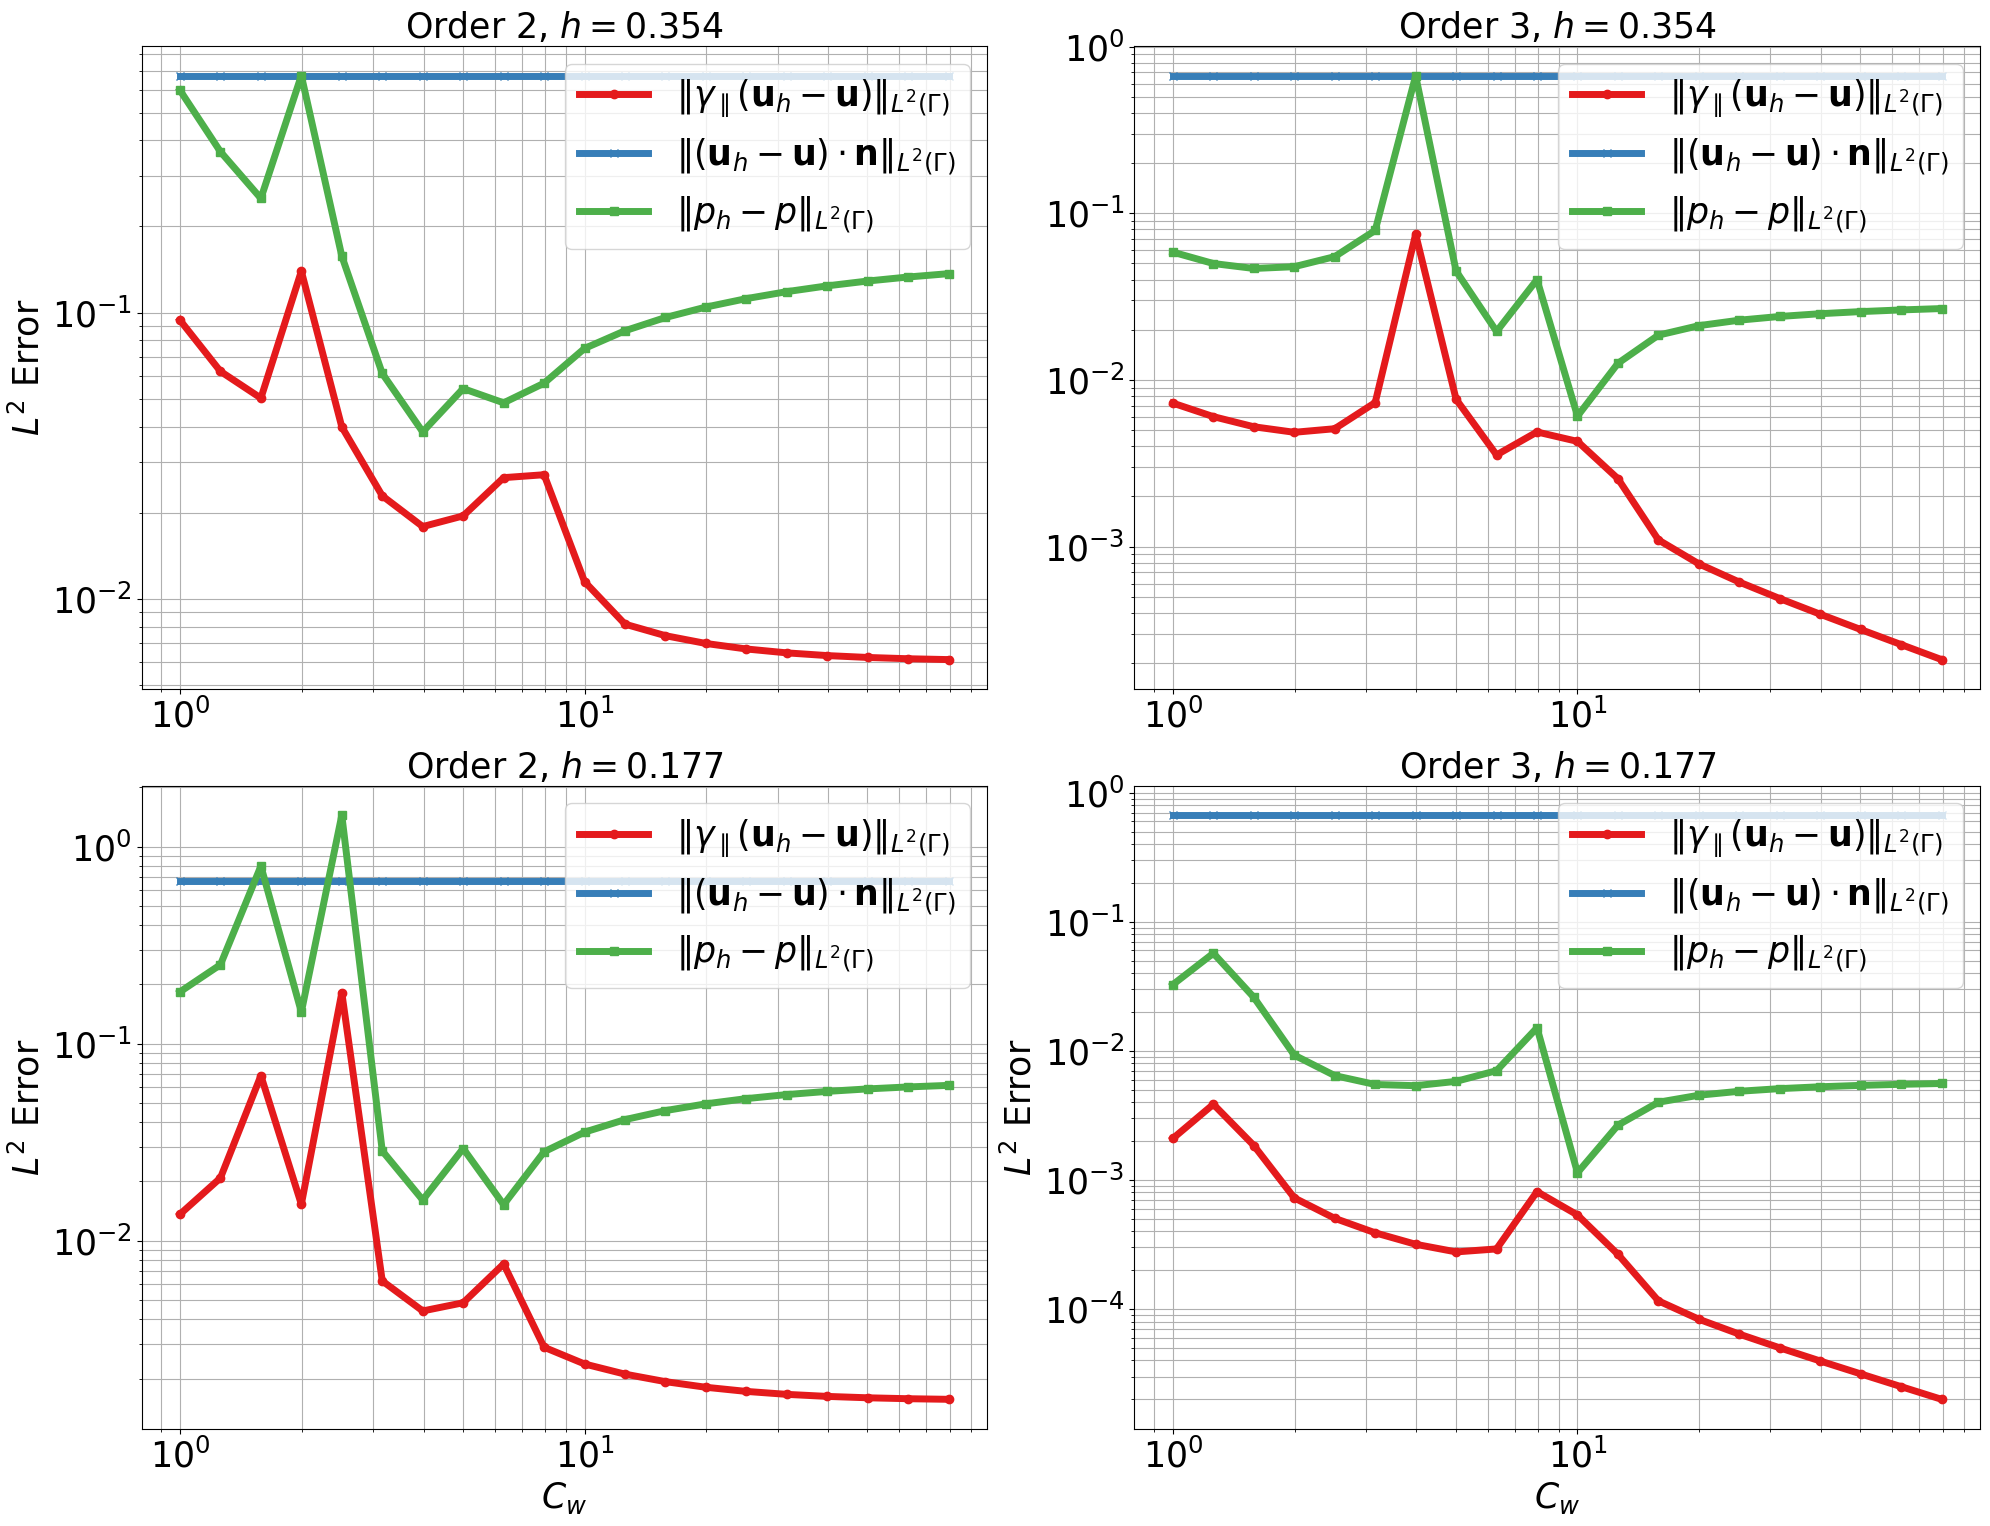

In [7]:
# Example settings
saveFigure2 = True
font_size = 25
line_width = 5
y_min, y_max = 1e-3, 12

# Create a 2x2 grid of subplots: first row for chosen_hmax_1, second for chosen_hmax_2
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# --- First row: hmax = chosen_hmax_1 ---

# Order 1
ax = axs[0, 0]
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_gamma_p_u'],
    label=r'$\Vert \gamma_{\parallel}(\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Gamma)}$', marker='o', linewidth=line_width, color=color1
)
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_u_n'],
    label=r'$\Vert (\mathbf{u}_h - \mathbf{u}) \cdot \mathbf{n} \Vert_{L^2(\Gamma)}$', marker='x', linewidth=line_width, color=color2
)
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_p_Gamma'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Gamma)}$', marker='s', linewidth=line_width, color=color3
)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlabel('$C_w$', fontsize=font_size)
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order1}, $h = {round(chosen_hmax_1, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)
#ax.set_ylim(y_min, y_max)

# Order 2
ax = axs[0, 1]
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_gamma_p_u'],
    label=r'$\Vert \gamma_{\parallel}(\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Gamma)}$', marker='o', linewidth=line_width, color=color1
)
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_u_n'],
    label=r'$\Vert (\mathbf{u}_h - \mathbf{u}) \cdot \mathbf{n} \Vert_{L^2(\Gamma)}$', marker='x', linewidth=line_width, color=color2
)
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_p_Gamma'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Gamma)}$', marker='s', linewidth=line_width, color=color3
)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlabel('$C_w$', fontsize=font_size)
#ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order2}, $h = {round(chosen_hmax_1, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)
#ax.set_ylim(y_min, y_max)

# --- Second row: hmax = chosen_hmax_2 ---

# Order 1
ax = axs[1, 0]
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_gamma_p_u'],
    label=r'$\Vert \gamma_{\parallel}(\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Gamma)}$', marker='o', linewidth=line_width, color=color1
)
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_u_n'],
    label=r'$\Vert (\mathbf{u}_h - \mathbf{u}) \cdot \mathbf{n} \Vert_{L^2(\Gamma)}$', marker='x', linewidth=line_width, color=color2
)
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_p_Gamma'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Gamma)}$', marker='s', linewidth=line_width, color=color3
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$C_w$', fontsize=font_size)
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order1}, $h = {round(chosen_hmax_2, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)
#ax.set_ylim(y_min, y_max)

# Order 2
ax = axs[1, 1]
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_gamma_p_u'],
    label=r'$\Vert \gamma_{\parallel}(\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Gamma)}$', marker='o', linewidth=line_width, color=color1
)
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_u_n'],
    label=r'$\Vert (\mathbf{u}_h - \mathbf{u}) \cdot \mathbf{n} \Vert_{L^2(\Gamma)}$', marker='x', linewidth=line_width, color=color2
)
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_p_Gamma'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Gamma)}$', marker='s', linewidth=line_width, color=color3
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$C_w$', fontsize=font_size)
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order2}, $h = {round(chosen_hmax_2, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)
#ax.set_ylim(y_min, y_max)

#/home/tellocam/CSE/669d3f0cd841266ae157f88f/figures/plots/1forms/2D/2D_1forms_Cw_figure1.pdf
#/home/tellocam/CSE/master_thesis/dataPrep2D/2D_1forms_Cw_figure1.pdf

plt.tight_layout(rect=[0, 0, 1, 0.96])
if saveFigure2:
    fig.savefig('../../669d3f0cd841266ae157f88f/figures/plots/1forms/2D/2D_1forms_Cw_L2BND.pdf', format='pdf',transparent=True, bbox_inches='tight')

plt.show()


/home/tellocam/academicVenv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


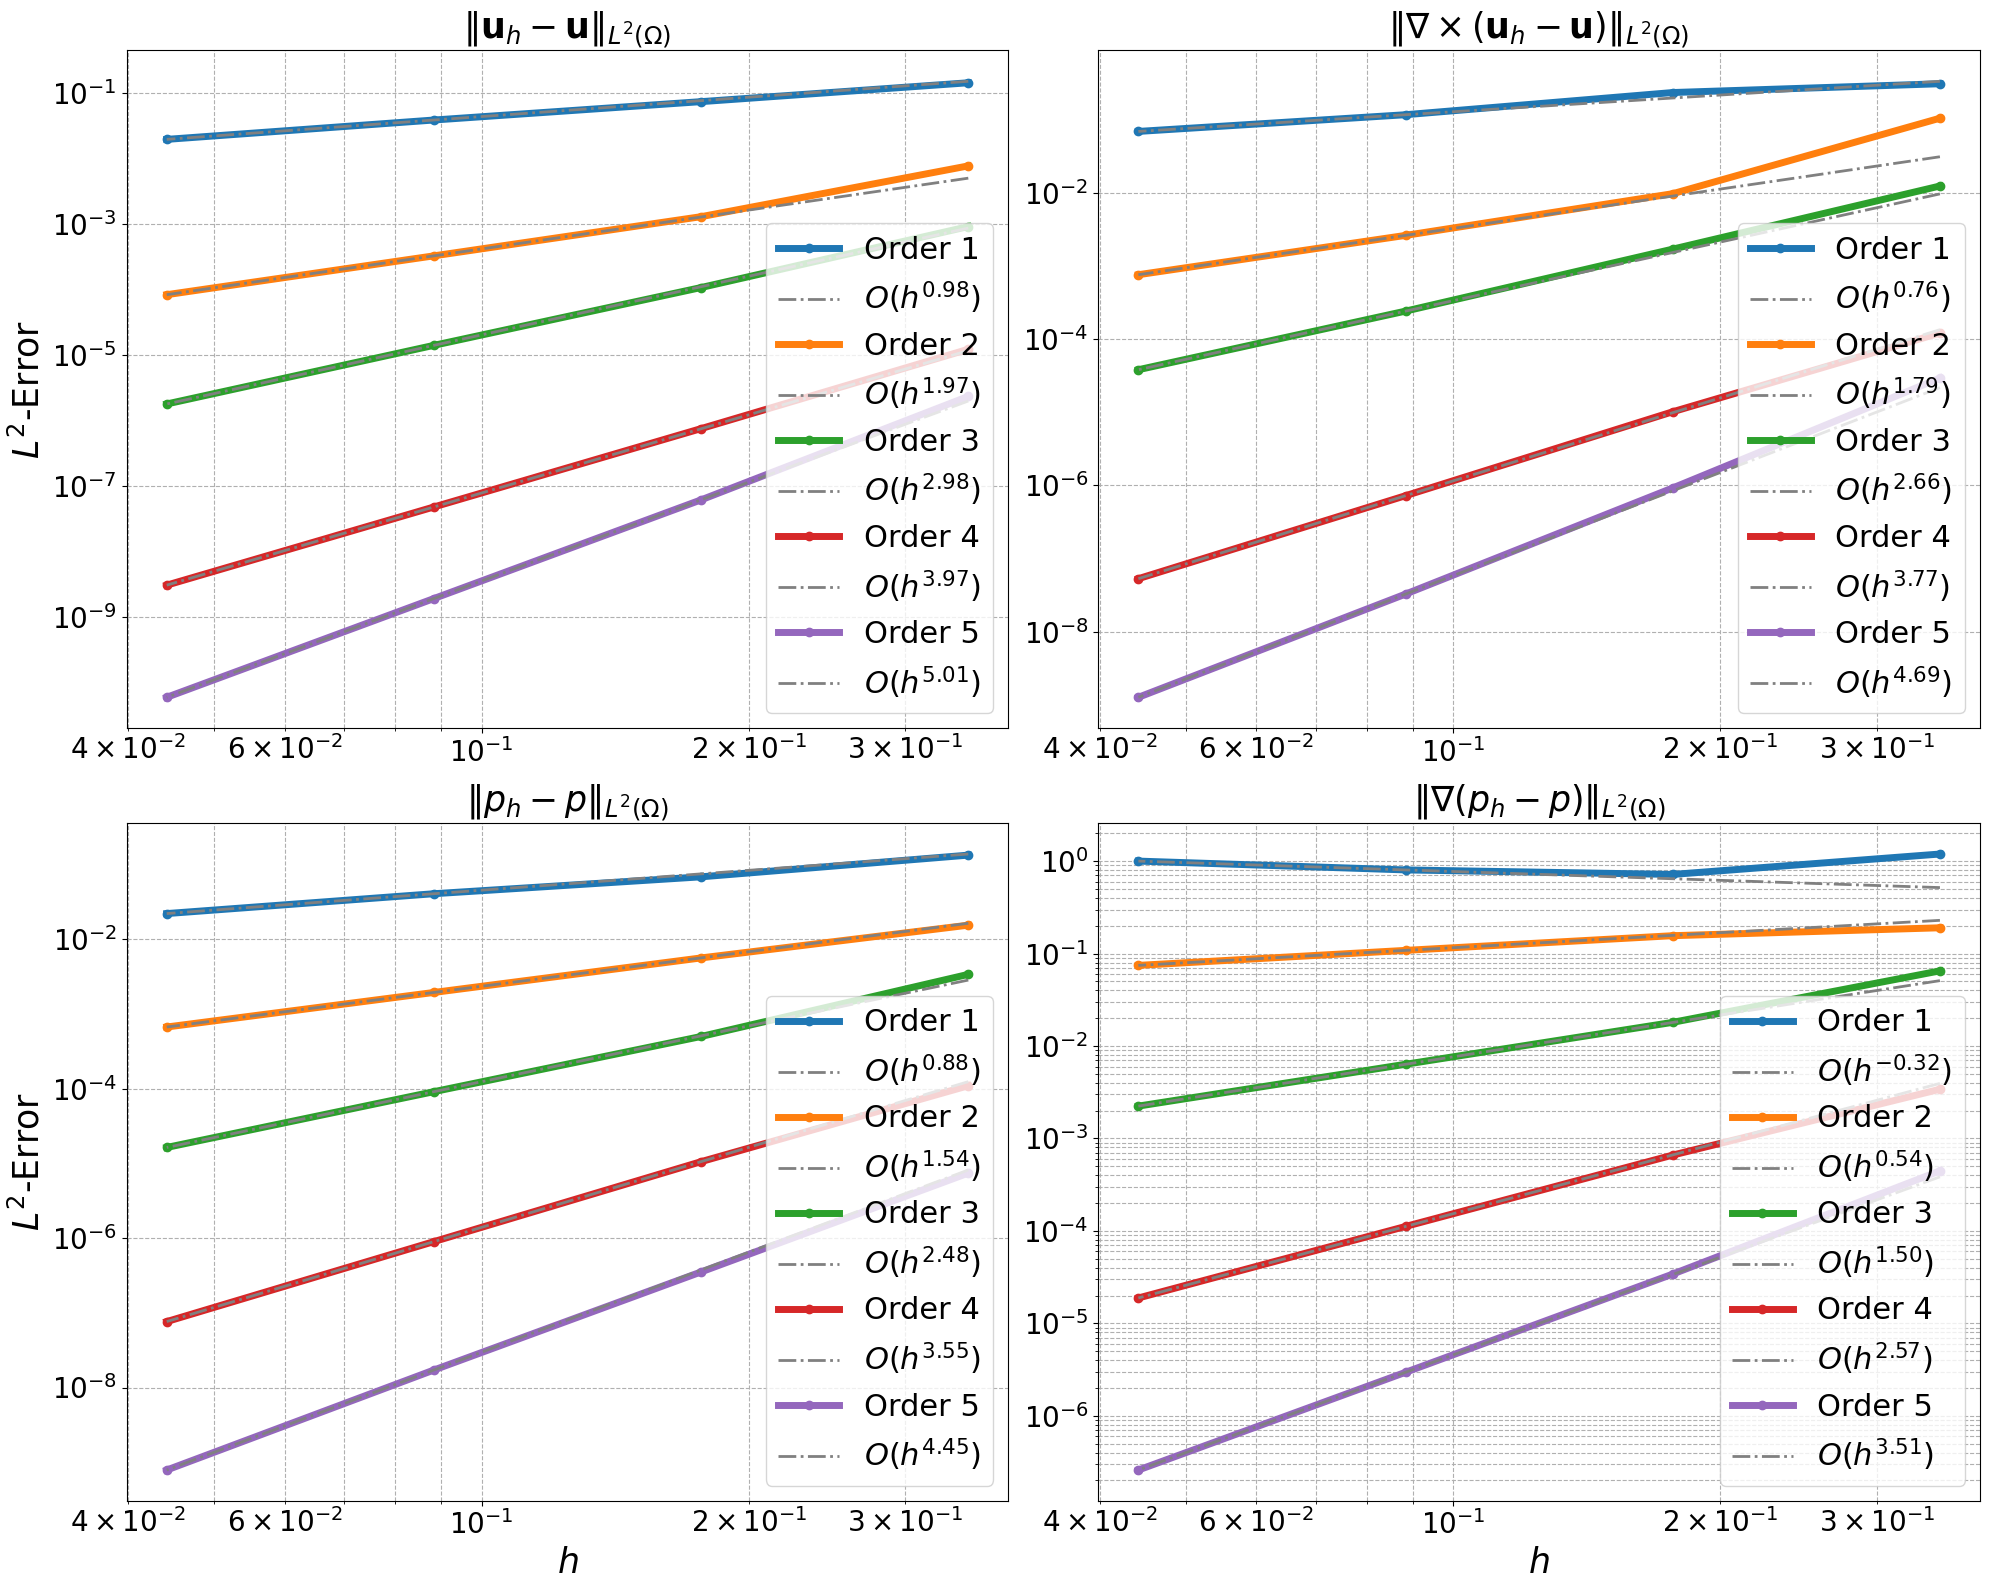

In [8]:
saveFigure3 = True
h_list = df['hmax'].unique()
order_list = df['order'].unique()
Cw_list = df['C_w'].unique()
nDof_list = df['ndof'].unique()

saveFigure3 = True
# Determine which C_w minimizes the L2 error of u per order
optimal_cw_per_order = {}
for order_cw in order_list:
    subset = df[df['order'] == order_cw]
    min_error_index = subset['L2_error_u'].idxmin()
    optimal_cw_per_order[order_cw] = subset.loc[min_error_index, 'C_w']

# For each order and hmax, pick the row corresponding to the optimal C_w
filtered_results = []
for order_cw in order_list:
    for hmax in h_list:
        group = df[
            (df['order'] == order_cw) &
            (df['hmax'] == hmax) &
            (df['C_w'] == optimal_cw_per_order[order_cw])
        ]
        if not group.empty:
            filtered_results.append(group.iloc[0])

df_filtered = pd.DataFrame(filtered_results)

# Define the error columns and their LaTeX titles
error_columns = [
    'L2_error_u',
    'L2_error_curl_u',
    'L2_error_p',
    'L2_error_grad_p'
]
error_titles = [
    r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$',
    r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$',
    r'$\Vert p_h - p \Vert_{L^2(\Omega)}$',
    r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$'
]

fig, axs = plt.subplots(2, 2, figsize=(20, 16))

for i, (err_col, err_title) in enumerate(zip(error_columns, error_titles)):
    row_idx = i // 2
    col_idx = i % 2
    ax = axs[row_idx, col_idx]
    
    # Plot the errors vs. h for each order
    for order_cw in order_list:
        order_group = df_filtered[df_filtered['order'] == order_cw]
        h_values = order_group['hmax'].values
        error_values = order_group[err_col].values

        # Plot the data points
        ax.plot(h_values, error_values, label=f'Order {int(order_cw)}', marker='o', linewidth=line_width)

        if len(h_values) >= 2:
            h_fit_values = h_values[-2:]
            error_fit_values = error_values[-2:]
            try:
                scaling_factor, slope = fit_reference_line(h_fit_values, error_fit_values)
                ref_values = scaling_factor * (h_values ** slope)
                ax.plot(
                    h_values, 
                    ref_values, 
                    linestyle='dashdot', 
                    color='gray',
                    linewidth = (line_width - 3),
                    label = f"$O(h^{{{slope:.2f}}})$"
                )
            except RuntimeError as e:
                # If fit_reference_line fails (e.g., curve_fit can't converge), just skip
                print(f"Warning: Slope fit failed for order {order_cw} with error: {e}")

    ax.set_xscale('log')
    ax.set_yscale('log')
    # Set x-axis label only for bottom plots
    if row_idx == (axs.shape[0] - 1):
        ax.set_xlabel(r'$h$', fontsize=font_size)
    
    # Set y-axis label only for left column plots
    if col_idx == 0:
        ax.set_ylabel(r'$L^2$-Error', fontsize=font_size)
    ax.set_title(err_title, fontsize=font_size)
    ax.grid(True, which='both', linestyle='--')
    ax.legend(fontsize=22, loc='lower right')
    ax.tick_params(axis='both', which='both', labelsize=font_size-5)

plt.tight_layout()
if saveFigure3:
    fig.savefig('../../669d3f0cd841266ae157f88f/figures/plots/1forms/2D/2D_1forms_h_convergence_L2.pdf',
                format='pdf', bbox_inches='tight')
plt.show()

/home/tellocam/academicVenv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


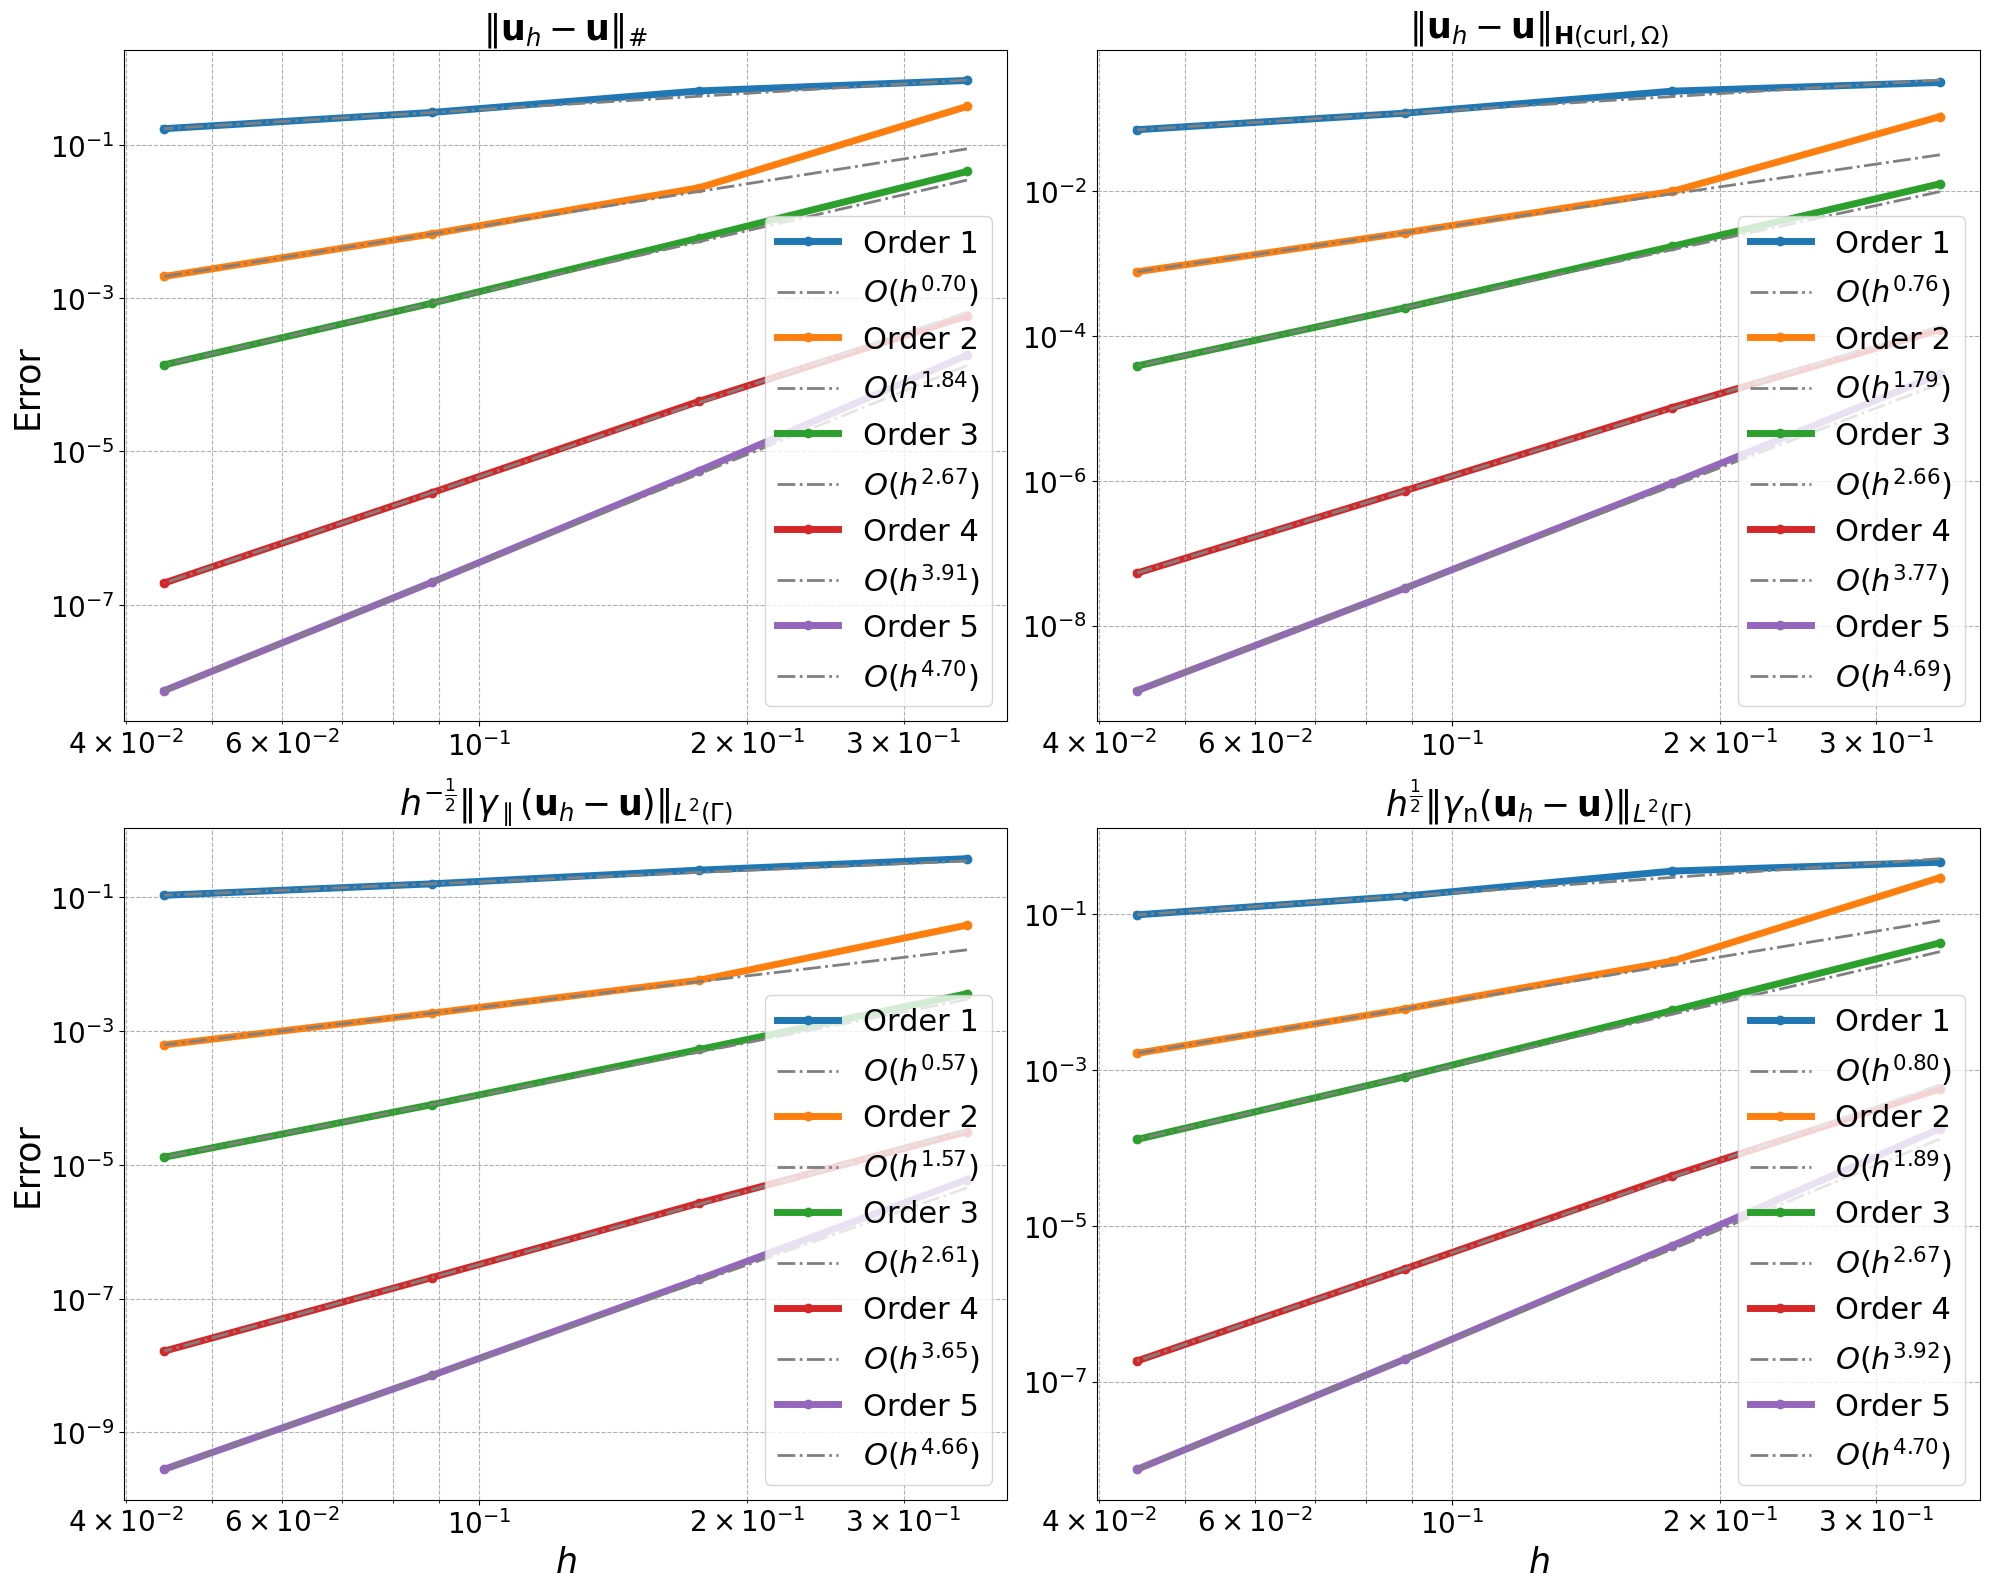

In [9]:
saveFigure4 = True
h_list = df['hmax'].unique()
order_list = df['order'].unique()
Cw_list = df['C_w'].unique()
nDof_list = df['ndof'].unique()

saveFigure3 = True
# Determine which C_w minimizes the L2 error of u per order
optimal_cw_per_order = {}
for order_cw in order_list:
    subset = df[df['order'] == order_cw]
    min_error_index = subset['L2_error_u'].idxmin()
    optimal_cw_per_order[order_cw] = subset.loc[min_error_index, 'C_w']

# For each order and hmax, pick the row corresponding to the optimal C_w
filtered_results = []
for order_cw in order_list:
    for hmax in h_list:
        group = df[
            (df['order'] == order_cw) &
            (df['hmax'] == hmax) &
            (df['C_w'] == optimal_cw_per_order[order_cw])
        ]
        if not group.empty:
            filtered_results.append(group.iloc[0])

df_filtered = pd.DataFrame(filtered_results)

# Define the error columns and their LaTeX titles
error_columns = [
    'HT_error_u',
    'L2_error_curl_u',
    'HT_error_gamma_p',
    'HT_error_gamma_n'
]
error_titles = [
    r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{\#}$',
    r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{\mathbf{H}(\mathrm{curl},\Omega)}$',
    r'$ h^{-\frac{1}{2}} \Vert \gamma_{\parallel}(\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Gamma)}$',
    r'$ h^{\frac{1}{2}} \Vert \gamma_{\mathrm{n}}(\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Gamma)}$'
]

fig, axs = plt.subplots(2, 2, figsize=(20, 16))

for i, (err_col, err_title) in enumerate(zip(error_columns, error_titles)):
    row_idx = i // 2
    col_idx = i % 2
    ax = axs[row_idx, col_idx]
    
    # Plot the errors vs. h for each order
    for order_cw in order_list:
        order_group = df_filtered[df_filtered['order'] == order_cw]
        h_values = order_group['hmax'].values
        error_values = order_group[err_col].values

        # Plot the data points
        ax.plot(h_values, error_values, label=f'Order {int(order_cw)}', marker='o', linewidth=line_width)

        if len(h_values) >= 2:
            h_fit_values = h_values[-2:]
            error_fit_values = error_values[-2:]
            try:
                scaling_factor, slope = fit_reference_line(h_fit_values, error_fit_values)
                ref_values = scaling_factor * (h_values ** slope)
                ax.plot(
                    h_values, 
                    ref_values, 
                    linestyle='dashdot', 
                    color='gray',
                    linewidth = (line_width - 3),
                    label = f"$O(h^{{{slope:.2f}}})$"
                )
            except RuntimeError as e:
                # If fit_reference_line fails (e.g., curve_fit can't converge), just skip
                print(f"Warning: Slope fit failed for order {order_cw} with error: {e}")

    ax.set_xscale('log')
    ax.set_yscale('log')
    # Set x-axis label only for bottom plots
    if row_idx == (axs.shape[0] - 1):
        ax.set_xlabel(r'$h$', fontsize=font_size)
    
    # Set y-axis label only for left column plots
    if col_idx == 0:
        ax.set_ylabel(r'Error', fontsize=font_size)
    ax.set_title(err_title, fontsize=font_size)
    ax.grid(True, which='both', linestyle='--')
    ax.legend(fontsize=22, loc='lower right')
    ax.tick_params(axis='both', which='both', labelsize=font_size-5)

plt.tight_layout()
if saveFigure4:
    fig.savefig('../../669d3f0cd841266ae157f88f/figures/plots/1forms/2D/2D_1forms_h_convergence_HT.pdf',
                format='pdf', bbox_inches='tight')
plt.show()